# Machine precision

(R. Landau book 1.7)

In [2]:
x=1
y=2
x/y

0.5

In [3]:
# approximate machine precision by checking if adding a small number to 1 makes a difference or not

value = 1.0
for i in range(60):
    value = value/2.0  
    value1 = 1.0  +  value
    value1_1 = value1 - 1.0 - value  # this should be 0 
    print(i,value,value1,value1_1)


0 0.5 1.5 0.0
1 0.25 1.25 0.0
2 0.125 1.125 0.0
3 0.0625 1.0625 0.0
4 0.03125 1.03125 0.0
5 0.015625 1.015625 0.0
6 0.0078125 1.0078125 0.0
7 0.00390625 1.00390625 0.0
8 0.001953125 1.001953125 0.0
9 0.0009765625 1.0009765625 0.0
10 0.00048828125 1.00048828125 0.0
11 0.000244140625 1.000244140625 0.0
12 0.0001220703125 1.0001220703125 0.0
13 6.103515625e-05 1.00006103515625 0.0
14 3.0517578125e-05 1.000030517578125 0.0
15 1.52587890625e-05 1.0000152587890625 0.0
16 7.62939453125e-06 1.0000076293945312 0.0
17 3.814697265625e-06 1.0000038146972656 0.0
18 1.9073486328125e-06 1.0000019073486328 0.0
19 9.5367431640625e-07 1.0000009536743164 0.0
20 4.76837158203125e-07 1.0000004768371582 0.0
21 2.384185791015625e-07 1.000000238418579 0.0
22 1.1920928955078125e-07 1.0000001192092896 0.0
23 5.960464477539063e-08 1.0000000596046448 0.0
24 2.9802322387695312e-08 1.0000000298023224 0.0
25 1.4901161193847656e-08 1.0000000149011612 0.0
26 7.450580596923828e-09 1.0000000074505806 0.0
27 3.7252902984

### 32-bit numbers
By default on modern architectures Python float numbers are 64-bit. Let's try with forced 32-bit floats 

In [4]:
# approximate machine precision by checking if adding a small number to 1 makes a difference or not

import numpy as np

value = np.float32(1.0)
one = np.float32(1.0)
two = np.float32(2.0)
for i in range(60):
    value = value/two  
    value1 = one  +  value
    value1_1 = value1 - one - value # this should be 0 
    print(i,value,value1,value1_1)


0 0.5 1.5 0.0
1 0.25 1.25 0.0
2 0.125 1.125 0.0
3 0.0625 1.0625 0.0
4 0.03125 1.03125 0.0
5 0.015625 1.01562 0.0
6 0.0078125 1.00781 0.0
7 0.00390625 1.00391 0.0
8 0.00195312 1.00195 0.0
9 0.000976562 1.00098 0.0
10 0.000488281 1.00049 0.0
11 0.000244141 1.00024 0.0
12 0.00012207 1.00012 0.0
13 6.10352e-05 1.00006 0.0
14 3.05176e-05 1.00003 0.0
15 1.52588e-05 1.00002 0.0
16 7.62939e-06 1.00001 0.0
17 3.8147e-06 1.0 0.0
18 1.90735e-06 1.0 0.0
19 9.53674e-07 1.0 0.0
20 4.76837e-07 1.0 0.0
21 2.38419e-07 1.0 0.0
22 1.19209e-07 1.0 0.0
23 5.96046e-08 1.0 -5.96046e-08
24 2.98023e-08 1.0 -2.98023e-08
25 1.49012e-08 1.0 -1.49012e-08
26 7.45058e-09 1.0 -7.45058e-09
27 3.72529e-09 1.0 -3.72529e-09
28 1.86265e-09 1.0 -1.86265e-09
29 9.31323e-10 1.0 -9.31323e-10
30 4.65661e-10 1.0 -4.65661e-10
31 2.32831e-10 1.0 -2.32831e-10
32 1.16415e-10 1.0 -1.16415e-10
33 5.82077e-11 1.0 -5.82077e-11
34 2.91038e-11 1.0 -2.91038e-11
35 1.45519e-11 1.0 -1.45519e-11
36 7.27596e-12 1.0 -7.27596e-12
37 3.63798e-12

### Subtractive cancelation
(R. Landau book 2.1.2)

The solutions of a quadratic equation can be calculoated in several, mathematically equivalent ways:

$$x={\frac {-b\pm {\sqrt {b^{2}-4ac\ }}}{2a}}$$ or
$$x={\frac {-2c}{b\pm {\sqrt {b^{2}-4ac}}}}.$$

Let's see them in numerical calculations.

In [5]:
a=1.0
b=1.0
for n in range(20):
    c = 10**(-(n+1))
    x1_a = (-b+np.sqrt(b**2-4.0*a*c)) / (2*a)
    x2_a = (-b-np.sqrt(b**2-4.0*a*c)) / (2*a)

    x1_b = -2.0*c / (b+np.sqrt(b**2-4.0*a*c))
    x2_b = -2.0*c / (b-np.sqrt(b**2-4.0*a*c))
    
    print(n+1,c,x1_a,x1_b,x1_a-x1_b, '        ',x2_a,x2_b,x2_a-x2_b)


1 0.1 -0.112701665379 -0.112701665379 1.38777878078e-17          -0.887298334621 -0.887298334621 1.11022302463e-16
2 0.01 -0.0101020514434 -0.0101020514434 -2.08166817117e-17          -0.989897948557 -0.989897948557 -1.99840144433e-15
3 0.001 -0.00100100200501 -0.00100100200501 2.42861286637e-17          -0.998998997995 -0.998998997995 2.42028619368e-14
4 0.0001 -0.000100010002 -0.000100010002001 5.55653613399e-18          -0.999899989998 -0.999899989998 5.56221735337e-14
5 1e-05 -1.0000100002e-05 -1.0000100002e-05 -1.66255626887e-17          -0.9999899999 -0.999989999898 -1.66244795707e-12
6 1e-06 -1.00000100001e-06 -1.000001e-06 -4.63390549619e-18          -0.999998999999 -0.999998999994 -4.63395988248e-12
7 1e-07 -1.00000009995e-07 -1.0000001e-07 5.1192156703e-18          -0.9999999 -0.999999900051 5.11921616209e-11
8 1e-08 -1.00000001058e-08 -1.00000001e-08 -5.75874043473e-18          -0.99999999 -0.999999989424 -5.75874126163e-10
9 1e-09 -1.00000002723e-09 -1.000000001e-09 -2.6229

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


In [6]:
np.log(np.exp(709.8))

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


inf

### Pretty tables and simple figures

In [7]:
import pandas as pd          # a copmplex package for data handling. We use its pretty table rendering capacity, here.
import matplotlib.pyplot as plt     # for plotting
# simple plot
#%matplotlib inline
# NEW interactive
%matplotlib notebook          
# the above row allows plot rendering in the notebook

# Same as above but instead of printing, collect data into a list
values = []
a=1.0
b=1.0
for n in range(20):
    c = 10**(-(n+1))
    x1_a = (-b+np.sqrt(b**2-4.0*a*c)) / (2*a)
    x2_a = (-b-np.sqrt(b**2-4.0*a*c)) / (2*a)

    x1_b = -2.0*c / (b+np.sqrt(b**2-4.0*a*c))
    x2_b = -2.0*c / (b-np.sqrt(b**2-4.0*a*c))
    
    values.append([n+1,c,x1_a,x1_b,x1_a-x1_b,x2_a,x2_b,x2_a-x2_b])
    
table = pd.DataFrame(values,columns=['N','c','x1_a','x1_b','x1_a-x1_b','x2_a','x2_b','x2_a-x2_b'])
table

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


,N,c,x1_a,x1_b,x1_a-x1_b,x2_a,x2_b,x2_a-x2_b
0,1,1.000000e-01,-1.127017e-01,-1.127017e-01,1.387779e-17,-0.887298,-0.887298,1.110223e-16
1,2,1.000000e-02,-1.010205e-02,-1.010205e-02,-2.081668e-17,-0.989898,-0.989898,-1.998401e-15
2,3,1.000000e-03,-1.001002e-03,-1.001002e-03,2.428613e-17,-0.998999,-0.998999,2.420286e-14
3,4,1.000000e-04,-1.000100e-04,-1.000100e-04,5.556536e-18,-0.999900,-0.999900,5.562217e-14
4,5,1.000000e-05,-1.000010e-05,-1.000010e-05,-1.662556e-17,-0.999990,-0.999990,-1.662448e-12
5,6,1.000000e-06,-1.000001e-06,-1.000001e-06,-4.633905e-18,-0.999999,-0.999999,-4.633960e-12
6,7,1.000000e-07,-1.000000e-07,-1.000000e-07,5.119216e-18,-1.000000,-1.000000,5.119216e-11
7,8,1.000000e-08,-1.000000e-08,-1.000000e-08,-5.758740e-18,-1.000000,-1.000000,-5.758741e-10
8,9,1.000000e-09,-1.000000e-09,-1.000000e-09,-2.622922e-17,-1.000000,-1.000000,-2.622922e-08
9,10,1.000000e-10,-1.000000e-10,-1.000000e-10,-8.264037e-18,-1.000000,-1.000000,-8.264036e-08


<IPython.core.display.Javascript object>


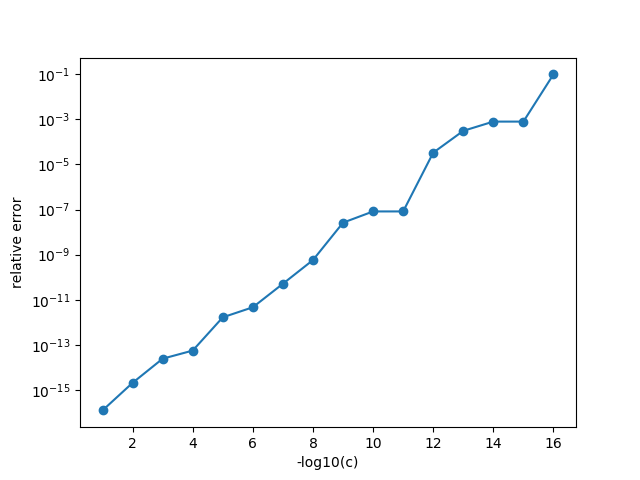

In [10]:
plt.semilogy(table['N'],np.abs(table['x1_a-x1_b']/(table['x1_a'])),'o-')
plt.xlabel('-log10(c)')
plt.ylabel('relative error')